In [3]:
import torch  # Core PyTorch library
import torch.nn as nn  # Neural network modules (layers, loss functions, etc.)
import torch.nn.functional as F  # Functional interface for activation functions, loss functions, etc.
from torch.utils.data import Dataset, DataLoader  # Dataset and DataLoader classes for handling data efficiently
from sklearn.model_selection import train_test_split  # Splits dataset into training and test sets

import pandas as pd  # Data manipulation and loading
import matplotlib.pyplot as plt  # Visualization library
%matplotlib inline  # Ensures plots are displayed directly in Jupyter Notebook


UsageError: unrecognized arguments: # Ensures plots are displayed directly in Jupyter Notebook


In [13]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=10, h2=11, out_features=3):  # Change in_features=5 to in_features=4
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [14]:
# Instantiate the Model class using parameter defaults
torch.manual_seed(32)  # For reproducibility
model = Model()

In [15]:
df = pd.read_csv('/content/iris (3).csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # Not needed with CrossEntropyLoss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [17]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [18]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.22303259
epoch: 11  loss: 0.87833655
epoch: 21  loss: 0.58939141
epoch: 31  loss: 0.39461419
epoch: 41  loss: 0.27418667
epoch: 51  loss: 0.16842622
epoch: 61  loss: 0.10710016
epoch: 71  loss: 0.08045476
epoch: 81  loss: 0.06811187
epoch: 91  loss: 0.06185398


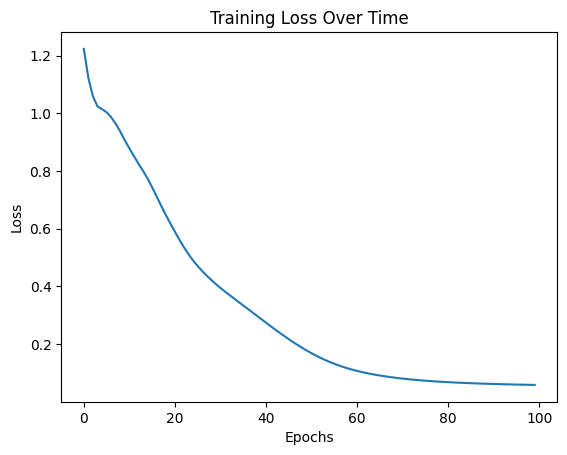

In [21]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

In [22]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06064259


In [23]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.0868,  5.4851, -0.1823])     1
 2. tensor([-1.3220,  6.1087, -1.5964])     1
 3. tensor([  9.5932,   4.2332, -17.2719])  0
 4. tensor([-3.6740,  5.9091,  1.9384])     1
 5. tensor([-8.4603,  5.7072,  8.9899])     2
 6. tensor([-13.1001,   6.0068,  15.5544])  2
 7. tensor([  9.5459,   4.4276, -17.2599])  0
 8. tensor([ 10.5079,   4.4073, -18.7977])  0
 9. tensor([-8.3007,  5.9583,  8.6161])     2
10. tensor([-10.5082,   6.2144,  11.7113])  2
11. tensor([-11.4983,   6.1714,  13.1680])  2
12. tensor([  9.3643,   3.9591, -16.8128])  0
13. tensor([-11.0567,   5.9112,  12.6369])  2
14. tensor([-4.0058,  5.7319,  2.4906])     1
15. tensor([-8.2574,  6.1449,  8.4863])     2
16. tensor([-1.3825,  5.8885, -1.3931])     1
17. tensor([-6.2744,  5.6553,  5.8262])     2
18. tensor([ 10.6742,   4.4654, -19.0832])  0
19. tensor([-3.6942,  5.9322,  1.9201])     1
20. tensor([-8.8572,  6.4742,  9.1737])     2
21. tensor([  9.9655,   4.2527, -17.8747])  0
22. tensor([ 11.1947,   4.8331, -2

In [32]:
torch.save(model.state_dict(), 'Lisiana.pt')

In [33]:
new_model = Model()
new_model.load_state_dict(torch.load('Lisiana.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [34]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06064259


In [35]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [36]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  9.6885,   5.0318, -17.6774])

Iris setosa
